In [2]:
import stereo as st
import numpy as np
import pandas as pd
import seaborn as sns
import os
import diopy
import scanpy as sc
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.pyplot import rc_context
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable  # 正确的导入路径
from matplotlib.colors import LinearSegmentedColormap

/home/fengyu/miniconda3/envs/st/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
def vector(on=False):
    if on:
        sc.set_figure_params(dpi=50, dpi_save=600, vector_friendly=False)
    else:
        sc.set_figure_params(dpi=50, dpi_save=600, vector_friendly=True)
vector(False)

# Figure2A

In [4]:
adata = sc.read_h5ad('/data1/fengyu/methods/zy/P5_D06053D2_ananlysis/Latest_analysis_6.12/readid4/Final_D06053D2_after_processed_cellbin.h5ad')
meta=pd.read_csv('/data1/fengyu/methods/zy/script_for_github_new/D06053D2_meta_with_all_cellid4_tsv.gz', sep='\t', comment='#')
gem = pd.read_csv('/data3/zhanxiaojuan/03.LC/00.raw_data/stereo_gef_gem_h5ad/D06053D2/D06053D2.cellbin.gem', sep='\t', comment='#')

/tmp/ipykernel_1652632/1616986820.py:2: DtypeWarning: Columns (4,9) have mixed types. Specify dtype option on import or set low_memory=False.
  meta=pd.read_csv('/data1/fengyu/methods/zy/script_for_github_new/D06053D2_meta_with_all_cellid4_tsv.gz', sep='\t', comment='#')


In [6]:
tissue_outline=pd.DataFrame(adata.uns['tissue_outline'],columns=['x','y'])

In [7]:
adata.obs['cellID']= range(adata.shape[0])
adata.obs['cellID']=adata.obs['cellID'].map(str)
adata.obs['bin50_x']=adata.obs['x']//50*50
adata.obs['bin50_y']=adata.obs['y']//50*50

array_2d = adata.obsm['cell_border'].reshape(-1, adata.obsm['cell_border'].shape[-1])

# 创建 DataFrame
df = pd.DataFrame(array_2d)
df['cellID'] = df.index // 32
df['cellID']=df['cellID'].astype(str)
df.rename(columns={0:'x',1:'y'}, inplace=True)
df_filtered = df[(df['x'] != 32767) & (df['y'] != 32767)]
df_filtered = pd.merge(df_filtered, adata.obs[['x','y','cellID']], on='cellID', how='left')
df_filtered['x']=df_filtered['x_x']+df_filtered['x_y']
df_filtered['y']=df_filtered['y_x']+df_filtered['y_y']
df_cellborder=df_filtered[['cellID','x','y']]

In [8]:
family_1322 = adata.obs[adata.obs['clone_family_id'] == 1322.0]
family_1322['bin200_x']=family_1322['x']//200*200
family_1322['bin200_y']=family_1322['y']//200*200

/tmp/ipykernel_1652632/1114950249.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  family_1322['bin200_x']=family_1322['x']//200*200
/tmp/ipykernel_1652632/1114950249.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  family_1322['bin200_y']=family_1322['y']//200*200


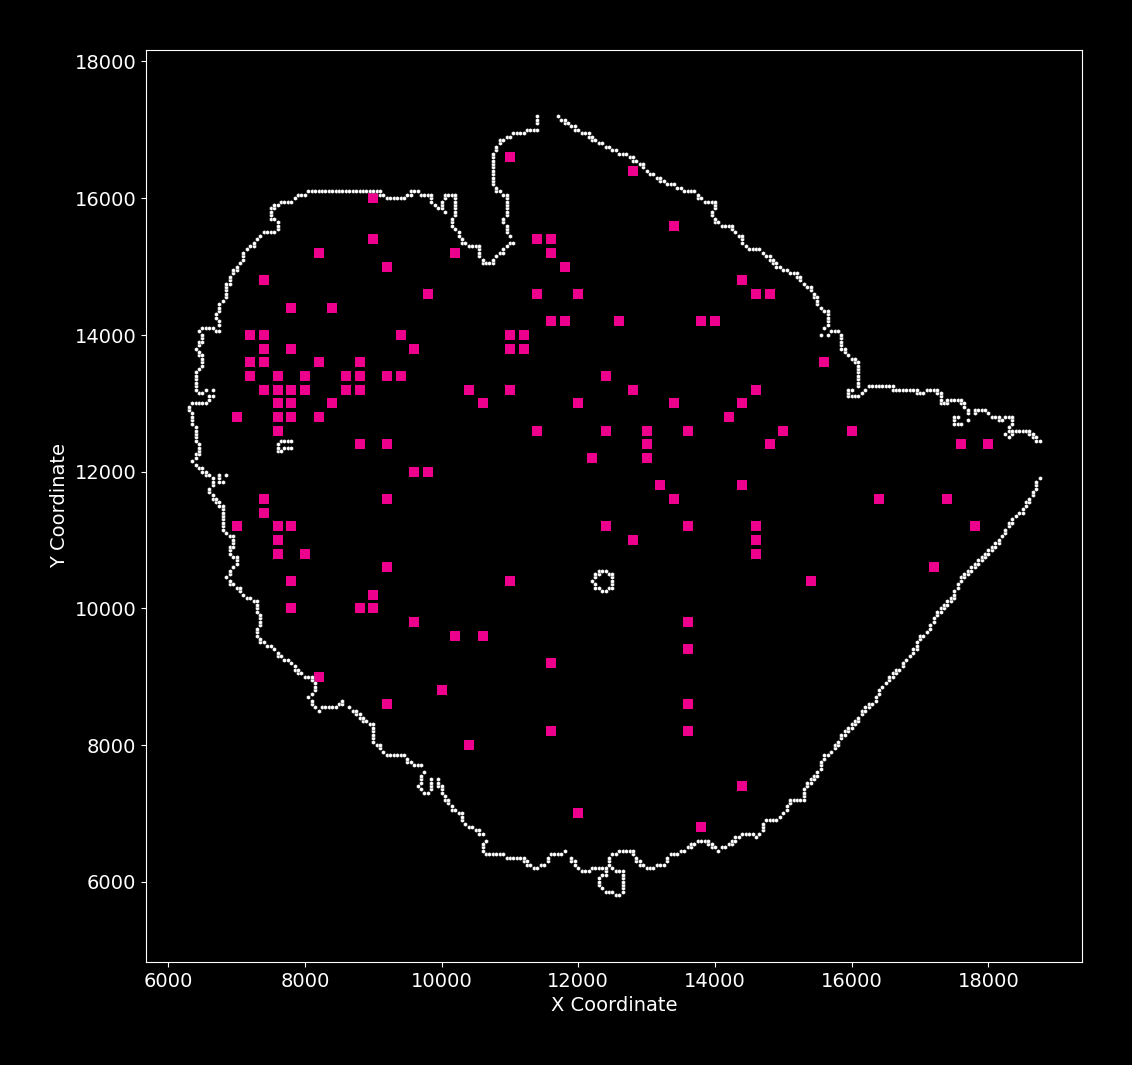

In [11]:
# overview
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns
from scipy.interpolate import splprep, splev

clone_expansion_color = '#ed008c'
EDGE_COLOR = 'white'
def vector(on=False):
    if on:
        sc.set_figure_params(dpi=50, dpi_save=300, vector_friendly=False)
    else:
        sc.set_figure_params(dpi=50, dpi_save=300, vector_friendly=True)
vector(False)


# 设置纯黑背景
plt.style.use('dark_background')

# 创建图形和坐标轴
fig, ax = plt.subplots(figsize=(12, 12))
fig.patch.set_facecolor('black')
ax.set_facecolor('black')

# 绘制IGH散点图（使用定义的颜色）
ax.scatter(family_1322['bin200_x'], 
           family_1322['bin200_y'], 
           color= clone_expansion_color, s=50,marker='s')

sns.scatterplot(x='x', y='y', 
                data=tissue_outline,
                color=EDGE_COLOR,
                marker='h',
                s=10,
                edgecolor='black',  # 添加深色边缘
                linewidth=0.2,       # 边缘线宽
                ax=ax)

# 设置坐标轴
ax.set_xlim(0, 32768)
ax.set_ylim(0, 32768)
ax.grid(False)
ax.axis('equal')

ax.set_xlabel("X Coordinate", color='white')
ax.set_ylabel("Y Coordinate", color='white')

# 保存图像
plt.savefig('Figure2A_bin200_scatterplot.png',
           dpi = 600 ,
           bbox_inches='tight',
           facecolor='black',
           transparent=False)

plt.show()

/tmp/ipykernel_1652632/4291379973.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  family_1322['cellID'] = family_1322['cellID'].astype(int)
/tmp/ipykernel_1652632/4291379973.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cellborder['cellID'] = df_cellborder['cellID'].astype(int)


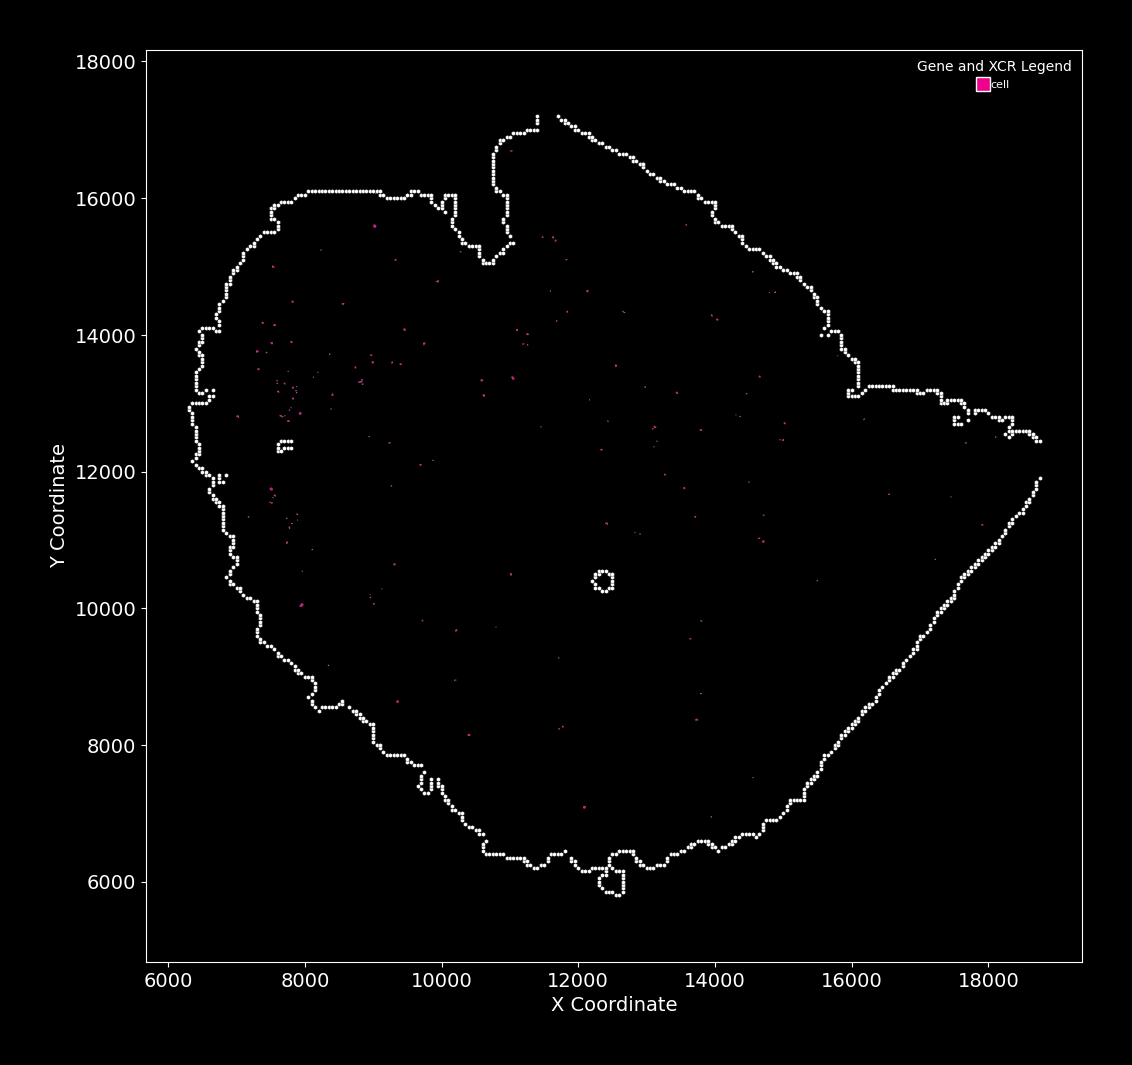

In [14]:
family_1322['cellID'] = family_1322['cellID'].astype(int)
df_cellborder['cellID'] = df_cellborder['cellID'].astype(int)
family_1322_cellborder = df_cellborder[df_cellborder['cellID'].isin(family_1322['cellID'])]
family_1322_cellborder_list = family_1322_cellborder.groupby('cellID').apply(lambda group: [[x, y] for x, y in zip(group['x'], group['y'])]).tolist()
family_1322_cellborder_list = [np.array(cell) for cell in family_1322_cellborder_list]
family_1322_cellborder_list[0]
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns
from scipy.interpolate import splprep, splev
from matplotlib.path import Path
from matplotlib.patches import PathPatch
from matplotlib.collections import PatchCollection

def vector(on=False):
    if on:
        sc.set_figure_params(dpi=50, dpi_save=300, vector_friendly=False)
    else:
        sc.set_figure_params(dpi=50, dpi_save=300, vector_friendly=True)
vector(False)

# 设置纯黑背景
plt.style.use('dark_background')

# 创建图形和坐标轴
fig, ax = plt.subplots(figsize=(12, 12))
fig.patch.set_facecolor('black')
ax.set_facecolor('black')

clone_expansion_color = '#ed008c'
EDGE_COLOR = 'white'
# 平滑边界函数（保持不变）
def smooth_boundary(boundary, smoothness=0.5):
    x = boundary[:, 0]
    y = boundary[:, 1]
    x = np.append(x, x[0])
    y = np.append(y, y[0])
    tck, u = splprep([x, y], s=smoothness * len(x), per=True)
    u_new = np.linspace(u.min(), u.max(), 100)
    x_new, y_new = splev(u_new, tck, der=0)
    return np.column_stack((x_new, y_new))

patches = []
for cell_boundary in family_1322_cellborder_list:
    if len(cell_boundary) < 3:
        continue
    smoothed_boundary = smooth_boundary(cell_boundary, smoothness=0.5)
    vertices = smoothed_boundary
    codes = [Path.LINETO] * len(vertices)
    codes[0] = Path.MOVETO
    codes[-1] = Path.CLOSEPOLY
    path = Path(vertices, codes)
    patch = PathPatch(path,
                      edgecolor= 'white',
                      facecolor= clone_expansion_color,
                      linewidth=0.1,
                      antialiased=True)
    patches.append(patch)

ax.add_collection(PatchCollection(patches, match_original=True))

sns.scatterplot(x='x', y='y', 
                data=tissue_outline,
                color=EDGE_COLOR,
                marker='h',
                s=10,
                edgecolor='black',  # 添加深色边缘
                linewidth=0.2,       # 边缘线宽
                ax=ax)


    
# 设置坐标轴
ax.set_xlim(5000, 20000)
ax.set_ylim(5000, 20000)
ax.grid(False)
ax.axis('equal')

# 创建精确匹配的图例
legend_elements = [
    Line2D([0], [0], marker='s', color='w', label='cell', markerfacecolor=clone_expansion_color, markersize=10),
]

# 添加图例并设置样式
legend = ax.legend(handles=legend_elements,
                   loc='upper right',
                   frameon=True,
                   framealpha=0.2,
                   facecolor='black',
                   edgecolor='white',
                   fontsize=8,
                   title='Gene and XCR Legend',
                   title_fontsize=10)

# 设置图例文本颜色
plt.setp(legend.get_texts(), color='white')
ax.set_xlabel("X Coordinate", color='white')
ax.set_ylabel("Y Coordinate", color='white')

# 保存图像
plt.savefig('Figure2A-cellbin-zoomin.png',
            dpi= 2500,
            bbox_inches='tight',
            facecolor='black',
            transparent=False)

plt.show()

# Figure2B

In [15]:
adata = sc.read_h5ad('/data3/zhanxiaojuan/03.LC/01.XCR/M1ML150001777_L01_D06053D2/04.processed_meta/M1ML150001777_L01_D06053D2.meta.preprocessed.h5ad')

/home/fengyu/miniconda3/envs/st/lib/python3.8/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [16]:
adata.obs['bin200_x'] = adata.obs['x'] //200*200
adata.obs['bin200_y'] = adata.obs['y'] //200*200

In [18]:
adata.obs['bin200_location_id'] = 'DNB_' + adata.obs['bin200_x'].astype(str) + '_' + adata.obs['bin200_y'].astype(str)
TRB = adata.obs[adata.obs['TRBcdr3aa'].notna()]
IGH = adata.obs[adata.obs['IGHcdr3aa'].notna()]

In [19]:
TRB_1 = TRB.value_counts('bin200_location_id')
TRB_1  = pd.DataFrame(TRB_1)
IGH_1 = IGH.value_counts('bin200_location_id')
IGH_1  = pd.DataFrame(IGH_1)

In [20]:
TRB_1 = TRB.value_counts('bin200_location_id')
TRB_1  = pd.DataFrame(TRB_1)
IGH_1 = IGH.value_counts('bin200_location_id')
IGH_1  = pd.DataFrame(IGH_1)

In [21]:
TRB_1['x'] = 2
IGH_1['x'] = 3
TRB_1['y'] = TRB_1[0]
IGH_1['y'] = IGH_1[0]

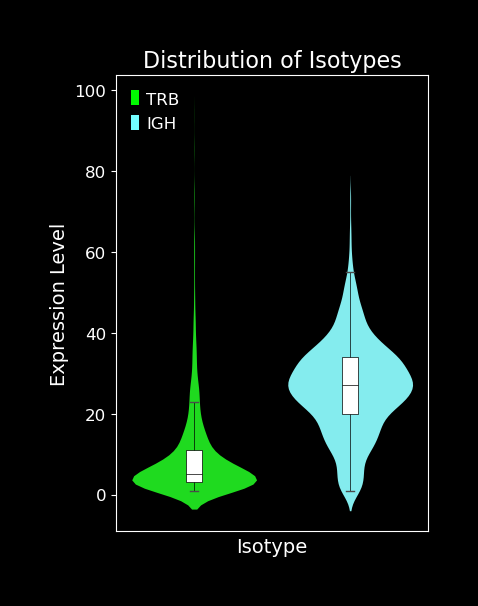

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 创建数据框并添加类别标签
df_TRB = pd.DataFrame(TRB_1, columns=['x', 'y'])
df_TRB['category'] = 'TRB'
df_IGH = pd.DataFrame(IGH_1, columns=['x', 'y'])
df_IGH['category'] = 'IGH'
# 合并所有数据
df_all = pd.concat([df_TRB, df_IGH])

# 设置图形大小
plt.figure(figsize=(4, 6))  # 设置为 8 英寸宽，6 英寸高

# 定义颜色映射
colors = {'TRB': '#00F900', 'IGH': '#73FDFF', 'IGK_L': '#F50538', 'TRA': '#ed008c'}

# 绘制小提琴图
sns.violinplot(x='category', y='y', data=df_all, 
               palette=colors.values(),
               scale='area',  # 使小提琴图的宽度根据数据量自动调整
               inner=None,    # 不显示内部图形
               linewidth=0,   # 移除小提琴图边缘的线
               cut=2)  # 控制小提琴图的尾部延伸范围，使图形更加“瘦长”

# 在小提琴图上叠加箱线图（内部设为白色）
sns.boxplot(x='category', y='y', data=df_all,
            width=0.1,  # 控制箱线图宽度
            boxprops=dict(facecolor='white', edgecolor='black', alpha=1, linewidth=0.5),  # 箱体白色，边框黑色，细化边框
            medianprops=dict(color='black', linewidth=0.5),  # 中位线黑色，细化中位线
            whiskerprops=dict(color='black', linewidth=0.5),  # 须线黑色，细化须线
            showfliers=False,  # 不显示异常点
            palette=colors.values())

# 设置网格和边框
plt.grid(False)

# 添加清晰的标题和轴标签
plt.title('Distribution of Isotypes', fontsize=16)
plt.ylabel('Expression Level', fontsize=14)
plt.xlabel('Isotype', fontsize=14)

# 调整字体大小
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# 添加图例（手动创建）
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor=colors['TRB'], label='TRB'),
                   Patch(facecolor=colors['IGH'], label='IGH')]
plt.legend(handles=legend_elements, fontsize=12)

# 隐藏x轴标签
plt.xticks([])

# 保存图像为高质量的矢量图
plt.savefig('Figure2B_distribution_of_isotype1_violin.pdf', dpi=600, format='pdf', bbox_inches='tight')

# 显示图形
plt.show()

# Figure2 E

In [23]:
adata = sc.read_h5ad('/data3/zhanxiaojuan/03.LC/01.XCR/M1ML150001777_L01_D06053D2/04.processed_meta/M1ML150001777_L01_D06053D2.meta.preprocessed.h5ad')

/home/fengyu/miniconda3/envs/st/lib/python3.8/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [24]:
tissue_outline=pd.DataFrame(adata.uns['tissue_outline'],columns=['x','y'])
adata.obs['bin200_x']=adata.obs['x']//200*200
adata.obs['bin200_y']=adata.obs['y']//200*200
df = adata.obs
df['bin200_loc'] = df['bin200_x'].astype(str) + '_' + df['bin200_y'].astype(str)

## view1

In [25]:
df1 = df

In [26]:
out = (
    df1.groupby('bin200_loc')[['TRAcdr3aa','TRBcdr3aa','IGHcdr3aa', 'IGK/Lcdr3aa']]
      .nunique()              # 对每一列分别算唯一值个数
      .reset_index()          # 如果希望结果是 DataFrame
)

tmp = out[(out['TRAcdr3aa'] > 1 )|
    (out['TRBcdr3aa'] > 1) |
    (out['IGHcdr3aa'] > 1) |
    (out['IGK/Lcdr3aa'] > 1)]

In [27]:
tmp_B = tmp[(tmp['IGHcdr3aa'] > 1) & (tmp['IGK/Lcdr3aa'] > 1) ]
tmp_T = tmp[(tmp['TRAcdr3aa'] > 1) & (tmp['TRAcdr3aa'] > 1) ]
union_df = pd.DataFrame({'bin200_loc': pd.concat([tmp_B['bin200_loc'], tmp_T['bin200_loc']]).drop_duplicates()})

## view2

In [28]:
df = adata.obs
df[df['IGHcdr3aa'].notna() | df['IGK/Lcdr3aa'].notna() | df['TRAcdr3aa'].notna() | df['TRBcdr3aa'].notna()]
df1 = df[((df['IGHcdr3aa'].notna()) & (df['IGK/Lcdr3aa'].notna())) | ((df['TRAcdr3aa'].notna()) & (df['TRBcdr3aa'].notna()))]
df['T'] = 0
mask = df['TRAcdr3aa'].notna() & df['TRBcdr3aa'].notna()
df.loc[mask, 'T'] = 1
df['B'] = 0
mask = df['IGHcdr3aa'].notna() & df['IGK/Lcdr3aa'].notna()
df.loc[mask, 'B'] = 1
#df['sum'] = df['T'] + df['B']
df['sum'] = df['B'] + df['T']
result = df.groupby('bin200_loc')['sum'].sum().reset_index()

In [29]:
result[result['sum'] == 0]

,bin200_loc,sum
30,10000_16000,0
117,10400_6800,0
119,10400_7200,0
158,10600_15000,0
160,10600_6600,0
...,...,...
2189,9600_7400,0
2190,9600_7600,0
2232,9800_16000,0
2233,9800_7200,0


## view3

In [30]:
tmp4 = tmp[(tmp['TRAcdr3aa'] == 1) & (tmp['TRBcdr3aa'] == 1)]

In [31]:
tmp4 

,bin200_loc,TRAcdr3aa,TRBcdr3aa,IGHcdr3aa,IGK/Lcdr3aa
29,10000_15800,1,1,2,2
44,10000_9800,1,1,12,8
83,10200_8600,1,1,14,7
98,10400_11600,1,1,14,6
138,10600_11000,1,1,12,8
...,...,...,...,...,...
2184,9600_15400,1,1,6,4
2191,9600_7800,1,1,9,6
2219,9800_13400,1,1,15,9
2238,9800_8200,1,1,11,5


## bin200

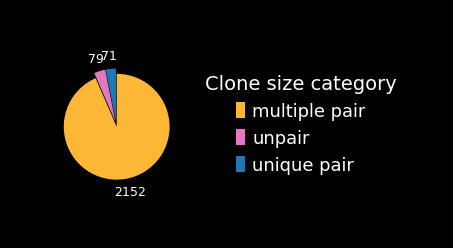

In [32]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('dark_background')
sizes  = [2152,79,71]
colors = ["#FCB735",'#E377C2',"#1F77B4"]
labels = ["multiple pair",'unpair',"unique pair"]


fig, ax = plt.subplots(figsize=(4, 4))

# 定义每块向外突出的距离（可微调）
explode = [0.05] * len(sizes)   # 0.05 表示 5% 的半径距离

wedges, texts = ax.pie(
    sizes,
    explode=explode,            # 关键：全部突出
    colors=colors,
    startangle=90,
    counterclock=False,
    wedgeprops=dict()
)

# 数值标签（位置已自动随 explode 外移）
for i, (w, s) in enumerate(zip(wedges, sizes)):
    ang = (w.theta1 + w.theta2) / 2
    x = np.cos(np.deg2rad(ang))
    y = np.sin(np.deg2rad(ang))
    ax.text(x * 1.30, y * 1.30, str(s),  # 1.30 微调防止重叠
            ha='center', va='center', fontsize=9, color='white')

ax.legend(
    wedges,
    labels,
    title="Clone size category",
    loc="center left",
    bbox_to_anchor=(1.05, 0.5),
    labelcolor='white'
)

#ax.set_title('Pie chart of clone size distribution', color='white')
plt.tight_layout()
plt.savefig('Figure2E_bin200.pdf', bbox_inches='tight')
plt.show()

## cellbin

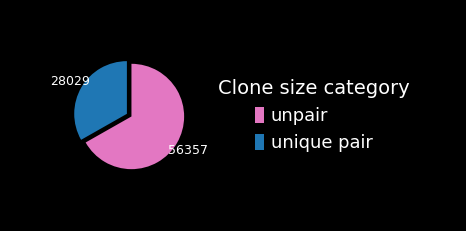

In [33]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('dark_background')
sizes  = [56357,28029]
colors = ['#E377C2',"#1F77B4"]
labels = ['unpair',
          "unique pair"]


fig, ax = plt.subplots(figsize=(4, 4))

# 定义每块向外突出的距离（可微调）
explode = [0.05] * len(sizes)   # 0.05 表示 5% 的半径距离

wedges, texts = ax.pie(
    sizes,
    explode=explode,            # 关键：全部突出
    colors=colors,
    startangle=90,
    counterclock=False,
    wedgeprops=dict()
)

# 数值标签（位置已自动随 explode 外移）
for i, (w, s) in enumerate(zip(wedges, sizes)):
    ang = (w.theta1 + w.theta2) / 2
    x = np.cos(np.deg2rad(ang))
    y = np.sin(np.deg2rad(ang))
    ax.text(x * 1.30, y * 1.30, str(s),  # 1.30 微调防止重叠
            ha='center', va='center', fontsize=9, color='white')

ax.legend(
    wedges,
    labels,
    title="Clone size category",
    loc="center left",
    bbox_to_anchor=(1.05, 0.5),
    labelcolor='white'
)

#ax.set_title('Pie chart of clone size distribution', color='white')
plt.tight_layout()
plt.savefig('Figure2E_cellbin.pdf', bbox_inches='tight')
plt.show()

# Figure 2H

In [34]:
adata = sc.read_h5ad('/data1/fengyu/methods/zy/P5_D06053D2_ananlysis/Latest_analysis_6.12/readid4/Final_D06053D2_after_processed_cellbin.h5ad')

In [37]:
tissue_outline=pd.DataFrame(adata.uns['tissue_outline'],columns=['x','y'])

In [35]:
clone_expansion_family_1352 = adata.obs[adata.obs['clone_family_id'] == 1352.0]
clone_expansion_family_1352 = clone_expansion_family_1352.reset_index()
#ed008c
clone_expansion_family_1352['cellID'] = clone_expansion_family_1352['cellID'].astype(int)
df_cellborder['cellID'] = df_cellborder['cellID'].astype(int)
clone_expansion_family_1352_cellborder = df_cellborder[df_cellborder['cellID'].isin(clone_expansion_family_1352['cellID'])]
clone_expansion_family_1352_cellborder
clone_expansion_family_1352_cellborder_list = clone_expansion_family_1352_cellborder.groupby('cellID').apply(lambda group: [[x, y] for x, y in zip(group['x'], group['y'])]).tolist()
clone_expansion_family_1352_cellborder_list = [np.array(cell) for cell in clone_expansion_family_1352_cellborder_list]
len(clone_expansion_family_1352_cellborder_list)

/tmp/ipykernel_1652632/3797799009.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cellborder['cellID'] = df_cellborder['cellID'].astype(int)


717

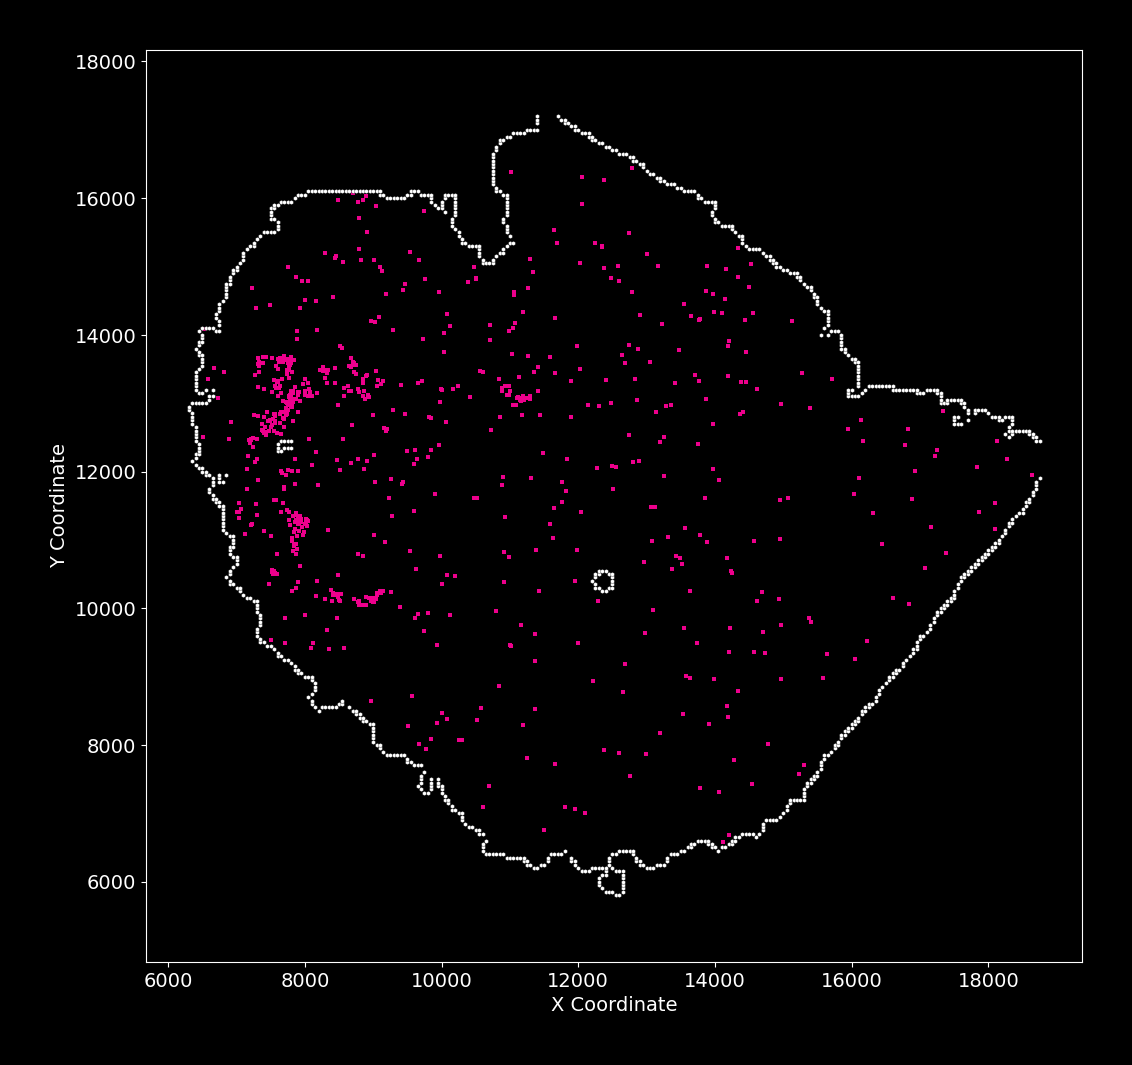

In [38]:
# overview
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns
from scipy.interpolate import splprep, splev

def vector(on=False):
    if on:
        sc.set_figure_params(dpi=50, dpi_save=300, vector_friendly=False)
    else:
        sc.set_figure_params(dpi=50, dpi_save=300, vector_friendly=True)
vector(False)


# 设置纯黑背景
plt.style.use('dark_background')

# 创建图形和坐标轴
fig, ax = plt.subplots(figsize=(12, 12))
fig.patch.set_facecolor('black')
ax.set_facecolor('black')

# 定义颜色变量确保一致性
IGH_FILTERED_COLOR =  '#73FDFF'  # 亮蓝
IGH_XCR_COLOR = '#F50538'          # 红色
TRB_FILTERED_COLOR = '#00F900' # 亮绿
TRB_XCR_COLOR = '#FBFD79'       # 紫色
EDGE_COLOR = 'white'           # 白色
clone_expansion_color = '#ed008c'
# 绘制IGH散点图（使用定义的颜色）
ax.scatter(clone_expansion_family_1352['x'], 
           clone_expansion_family_1352['y'], 
           color=clone_expansion_color, s=10,marker='s')

sns.scatterplot(x='x', y='y', 
               data=tissue_outline,
               color=EDGE_COLOR,
               marker='h',
               s=10,
               edgecolor='black',  # 添加深色边缘
               linewidth=0.2,       # 边缘线宽
               ax=ax)


# 设置坐标轴
ax.set_xlim(0, 32768)
ax.set_ylim(0, 32768)
ax.grid(False)
ax.axis('equal')


ax.set_xlabel("X Coordinate", color='white')
ax.set_ylabel("Y Coordinate", color='white')

# 保存图像
plt.savefig('clone-expansion-family-1352-overview.png',
           dpi = 600 ,
           bbox_inches='tight',
           facecolor='black',
           transparent=False)

plt.show()

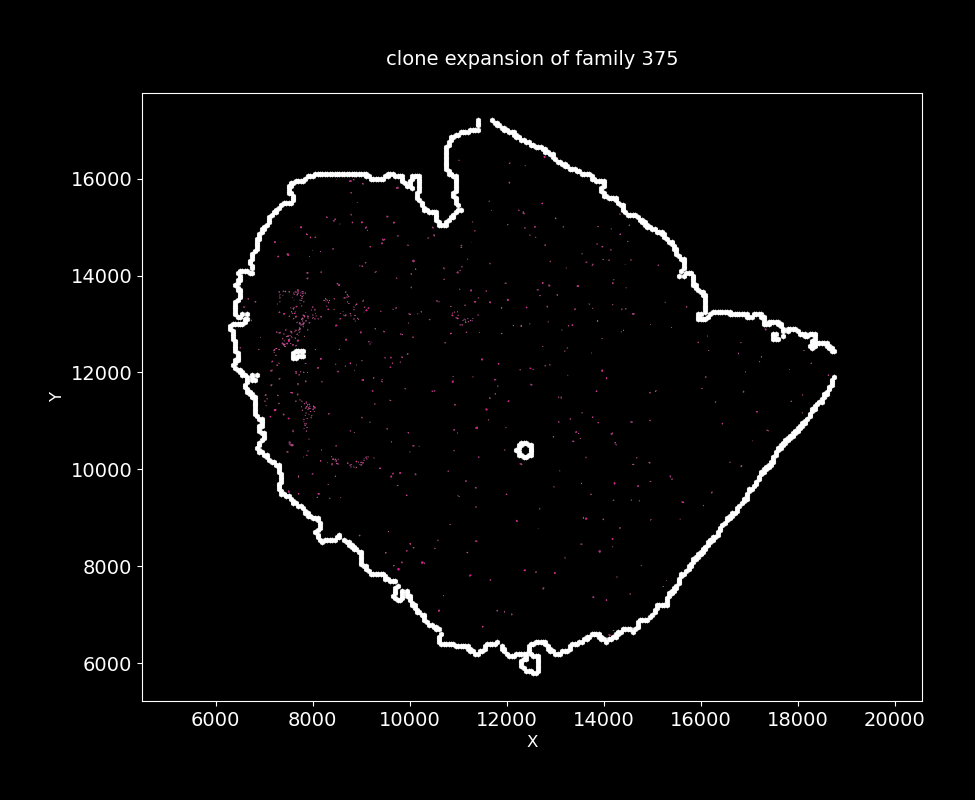

In [40]:
### zoomin
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import PathPatch
from matplotlib.path import Path
from matplotlib.collections import PatchCollection
import seaborn as sns
from scipy.interpolate import splprep, splev

# 设置纯黑背景
plt.style.use('dark_background')

# 创建图形和坐标轴
def vector(on=False):
    if on:
        sc.set_figure_params(dpi=50, dpi_save=300, vector_friendly=False)
    else:
        sc.set_figure_params(dpi=50, dpi_save=300, vector_friendly=True)
vector(False)

# 创建图形对象
fig, ax = plt.subplots(figsize=(10, 8))
fig.patch.set_facecolor('black')  # 图形背景设为黑色
ax.set_facecolor('black')         # 坐标轴背景设为黑色

# 存储所有多边形的列表
patches = []

def smooth_boundary(boundary, smoothness=0.5):
    """使用样条插值平滑边界"""
    x = boundary[:, 0]
    y = boundary[:, 1]
    
    # 闭合曲线
    x = np.append(x, x[0])
    y = np.append(y, y[0])
    
    # 计算样条曲线
    tck, u = splprep([x, y], s=smoothness * len(x), per=True)
    u_new = np.linspace(u.min(), u.max(), 100)
    x_new, y_new = splev(u_new, tck, der=0)
    
    return np.column_stack((x_new, y_new))

# 遍历所有细胞边界
for idx, cell_boundary in enumerate(clone_expansion_family_1352_cellborder_list, start=1):
    smoothed_boundary = smooth_boundary(cell_boundary, smoothness=0.5)
    clone_expansion_color = '#ed008c'

    # 创建平滑的路径
    vertices = smoothed_boundary
    codes = [Path.LINETO] * len(vertices)
    codes[0] = Path.MOVETO
    codes[-1] = Path.CLOSEPOLY
    
    path = Path(vertices, codes)
    patch = PathPatch(
        path,
        facecolor=clone_expansion_color,      # 使用你的颜色变量
        edgecolor='white',    # 白色边界
        lw=0.1,              # 边界线宽
        antialiased=True
    )
    patches.append(patch)

# 批量绘制多边形
ax.add_collection(PatchCollection(patches, match_original=True))

# 绘制散点图（使用白色六边形）
sns.scatterplot(
    x='x', 
    y='y', 
    data=tissue_outline,
    color='white',       # 白色散点
    marker='h',         # 六边形标记
    s=15,              # 点的大小
    edgecolor='white',   # 无边缘线
    ax=ax
)

# 坐标轴设置
ax.set_xlim(0, 40000)
ax.set_ylim(0, 40000)

# 坐标轴标签和刻度颜色
ax.set_xlabel("X", color='white', fontsize=12)
ax.set_ylabel("Y", color='white', fontsize=12)

# 坐标轴颜色设置
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['right'].set_color('white')

# 刻度颜色设置
ax.tick_params(axis='both', colors='white')

ax.grid(False)  # 确保网格线不显示
ax.axis('equal')  # 保持比例
# 设置标题（白色文字）
ax.set_title(
    "clone expansion of family 375",
    color='white',
    pad=20
)


# 保存为PNG（高分辨率，纯黑背景）
plt.savefig('clone-expansion-family-1352-zoomin.png', 
           dpi=2500,                   # 高分辨率
           bbox_inches='tight',       # 紧凑布局
           facecolor='black',         # 背景颜色
           transparent=False)         # 不透明

# 显示图形
plt.show()

# Figure2I

In [41]:
adata11 = sc.read_h5ad('/data3/zhanxiaojuan/03.LC/01.XCR/M1ML150001777_L01_D06053D2/04.processed_meta/M1ML150001777_L01_D06053D2.meta.preprocessed.h5ad')

/home/fengyu/miniconda3/envs/st/lib/python3.8/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [42]:
(adata11.obs['IGHcdr3aa'].value_counts() >= 10).sum()

437

In [43]:
((adata11.obs['IGHcdr3aa'].value_counts() >= 2) & (adata11.obs['IGHcdr3aa'].value_counts() < 10)).sum()

1421

In [44]:
(adata11.obs['IGHcdr3aa'].value_counts() == 1).sum()

2061

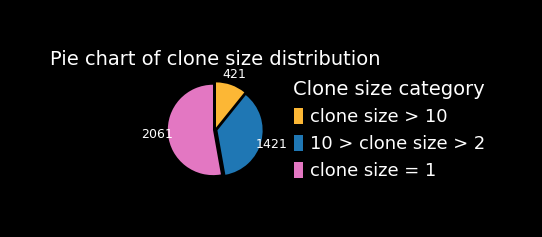

In [45]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('dark_background')
sizes  = [421, 1421, 2061]
colors = ["#FCB735","#1F77B4",'#E377C2']
labels = ["clone size > 10",
          "10 > clone size > 2",
          "clone size = 1"]


fig, ax = plt.subplots(figsize=(4, 4))

# 定义每块向外突出的距离（可微调）
explode = [0.05] * len(sizes)   # 0.05 表示 5% 的半径距离

wedges, texts = ax.pie(
    sizes,
    explode=explode,            # 关键：全部突出
    colors=colors,
    startangle=90,
    counterclock=False,
    wedgeprops=dict()
)

# 数值标签（位置已自动随 explode 外移）
for i, (w, s) in enumerate(zip(wedges, sizes)):
    ang = (w.theta1 + w.theta2) / 2
    x = np.cos(np.deg2rad(ang))
    y = np.sin(np.deg2rad(ang))
    ax.text(x * 1.30, y * 1.30, str(s),  # 1.30 微调防止重叠
            ha='center', va='center', fontsize=9, color='white')

ax.legend(
    wedges,
    labels,
    title="Clone size category",
    loc="center left",
    bbox_to_anchor=(1.05, 0.5),
    labelcolor='white'
)

ax.set_title('Pie chart of clone size distribution', color='white')
plt.tight_layout()
plt.savefig('Figure2I.pdf', bbox_inches='tight')
plt.show()

# Figure2J

In [46]:
adata = sc.read_h5ad('/data1/fengyu/methods/zy/P5_D06053D2_ananlysis/Latest_analysis_6.12/readid4/Final_D06053D2_after_processed_cellbin.h5ad')

In [ ]:
gem = pd.read_csv('/data3/zhanxiaojuan/03.LC/00.raw_data/stereo_gef_gem_h5ad/D06053D2/D06053D2.cellbin.gem', sep='\t', comment='#')

In [48]:
CSR_row = adata.obs[adata.obs['CSR'] == 'yes']
CSR_row['cellID'].nunique()
CSR_row_cellid = CSR_row['cellID'].astype(int)
CSR_row_border = df_cellborder[df_cellborder['cellID'].isin(CSR_row_cellid)]
# 目标基因列表
target_genes = ['IGHG1', 'IGHG2', 'IGHG3', 'IGHG4', 'IGHA1', 'IGHA2', 'IGHM', 'IGHD', 'IGHE']
target_genes = [gene.upper() for gene in target_genes]  # 统一大写
all_IGH_gene = gem[gem['geneName'].isin(target_genes)]

In [49]:
from shapely.geometry import Point, Polygon
from shapely.strtree import STRtree
import pandas as pd
from tqdm import tqdm
import concurrent.futures

# 示例数据 df1
df9 = CSR_row_border
# 示例数据 df2
df10 = all_IGH_gene

# 将 df1 中的每个 cellID 的顶点坐标转换为多边形
polygons = df9.groupby('cellID').apply(
    lambda group: Polygon(zip(group['x'], group['y']))
).reset_index(name='polygon')

# 创建空间索引
spatial_index = STRtree(polygons['polygon'])

# 将 df2 中的每个点转换为 Point 对象
df10['point'] = df10.apply(lambda row: Point(row['x'], row['y']), axis=1)


def find_cellID(point, polygons, spatial_index):
    # 使用空间索引快速筛选可能包含点的多边形
    possible_matches_index = list(spatial_index.query(point))
    possible_matches = polygons.iloc[possible_matches_index]
    for _, row in possible_matches.iterrows():
        # 使用 intersects 方法替代 contains 方法
        if row['polygon'].intersects(point):
            return row['cellID']
    return None



# 单线程处理

def process_single_thread(df, polygons, spatial_index):
    df['cellID'] = df['point'].apply(lambda point: find_cellID(point, polygons, spatial_index))
    return df
# 调用单线程处理函数
df10 = process_single_thread(df10, polygons, spatial_index)

print(df10)
df10 = df10.dropna()
df10['cellID'].nunique()
IGH_filtered_gene_cor_withcellid = df10

/tmp/ipykernel_1652632/3400298512.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df10['point'] = df10.apply(lambda row: Point(row['x'], row['y']), axis=1)


                   geneID geneName      x      y  MIDCount  ExonCount  CellID  \
1680      ENSG00000211897    IGHG3  11560  17186         1          1  187605   
1959      ENSG00000211895    IGHA1  11555  17198         1          1  187605   
1975      ENSG00000211897    IGHG3  11570  17198         1          1  187605   
2890      ENSG00000211896    IGHG1  11583  17184         1          1  187601   
3611      ENSG00000211892    IGHG4  11635  17163         1          1  187600   
...                   ...      ...    ...    ...       ...        ...     ...   
90057836  ENSG00000211899     IGHM  13667  14925         1          1  172928   
90058062  ENSG00000211895    IGHA1  13693  14927         1          1  172928   
90058774  ENSG00000211896    IGHG1  13684  14907         1          1  172929   
90060686  ENSG00000211896    IGHG1  13674  15041         1          1  172932   
90060687  ENSG00000211897    IGHG3  13674  15041         1          1  172932   

                        poi

/tmp/ipykernel_1652632/3400298512.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cellID'] = df['point'].apply(lambda point: find_cellID(point, polygons, spatial_index))


In [50]:
CSR_row_border_list = CSR_row_border.groupby('cellID').apply(lambda group: [[x, y] for x, y in zip(group['x'], group['y'])]).tolist()
# 将每个细胞的坐标转换为 NumPy 数组
CSR_row_border_list = [np.array(cell) for cell in CSR_row_border_list]
CSR_row_border_list[0]

array([[12533,  5993],
       [12515,  6011],
       [12515,  6013],
       [12520,  6019],
       [12529,  6023],
       [12531,  6023],
       [12540,  6009],
       [12538,  5994]])

In [51]:
CSR_gene = IGH_filtered_gene_cor_withcellid[IGH_filtered_gene_cor_withcellid['cellID'].isin(CSR_row_cellid)]
CSR_gene['tmp'] = CSR_gene['geneName'].str[:4]
CSR_gene.head()

,geneID,geneName,x,y,MIDCount,ExonCount,CellID,point,cellID,tmp
1680,ENSG00000211897,IGHG3,11560,17186,1,1,187605,POINT (11560 17186),187614.0,IGHG
1959,ENSG00000211895,IGHA1,11555,17198,1,1,187605,POINT (11555 17198),187614.0,IGHA
1975,ENSG00000211897,IGHG3,11570,17198,1,1,187605,POINT (11570 17198),187614.0,IGHG
4224,ENSG00000211896,IGHG1,12035,16900,1,1,187599,POINT (12035 16900),187608.0,IGHG
4502,ENSG00000211892,IGHG4,12040,16910,2,2,187599,POINT (12040 16910),187608.0,IGHG


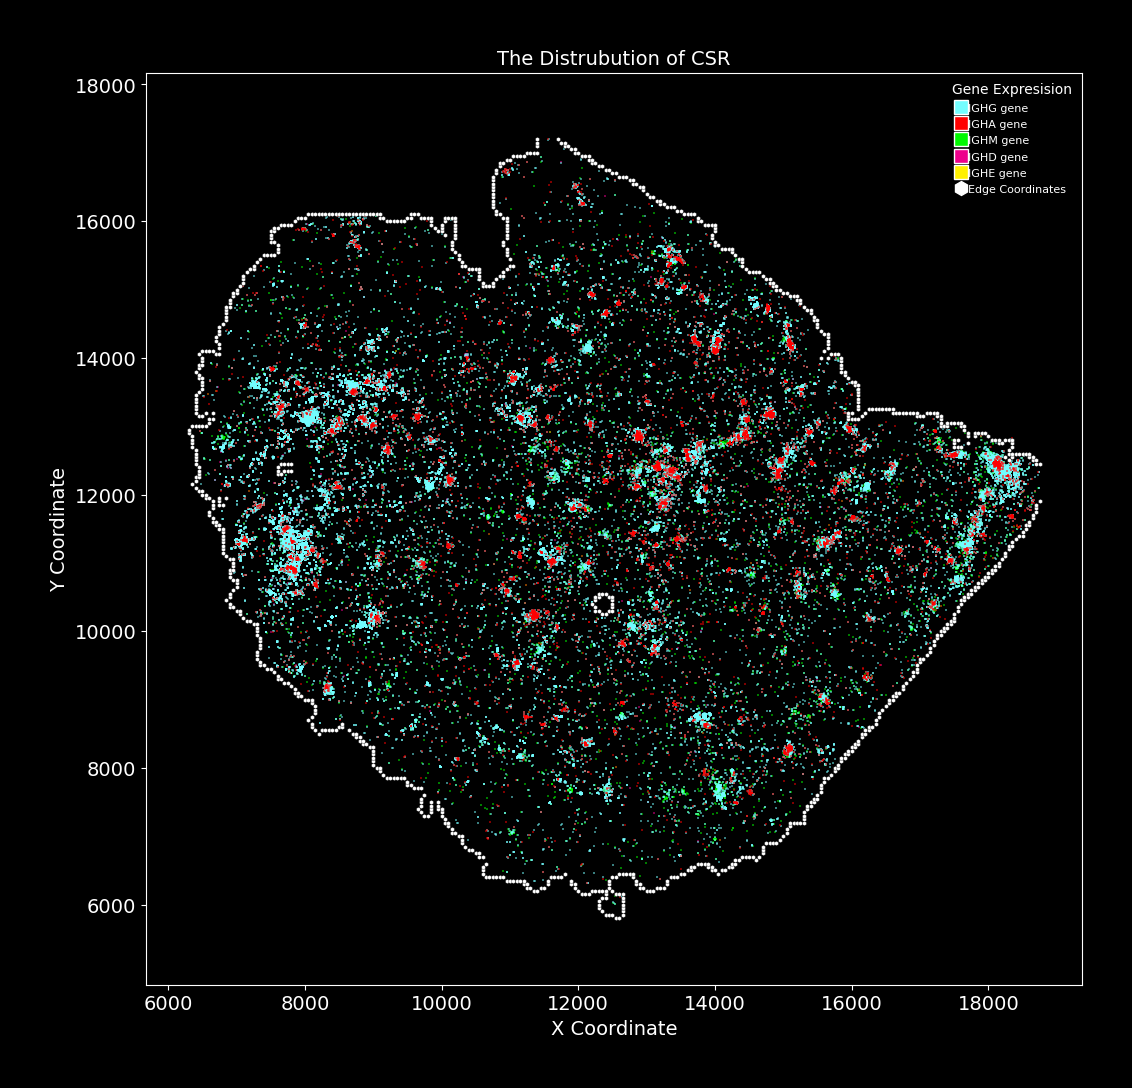

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns
from scipy.interpolate import splprep, splev
from matplotlib.path import Path
from matplotlib.path import Path
from matplotlib.patches import PathPatch
from matplotlib.collections import PatchCollection

def vector(on=False):
    if on:
        sc.set_figure_params(dpi=50, dpi_save=300, vector_friendly=False)
    else:
        sc.set_figure_params(dpi=50, dpi_save=300, vector_friendly=True)
vector(False)

# 设置纯黑背景
plt.style.use('dark_background')

# 创建图形和坐标轴
fig, ax = plt.subplots(figsize=(12,12))
fig.patch.set_facecolor('black')
ax.set_facecolor('black')

# 定义颜色变量确保一致性
IGHG_color = '#73FDFF'  # 亮蓝
IGHA_color = 'red'          # 红色
IGHM_color = '#00F900' # 亮绿
IGHD_color = '#ed008c'       # 
#IGHE_color = 'gray'   
IGHE_color = '#fff000'       # 橙色
EDGE_COLOR = 'white'           # 白色

# 绘制TRG散点图（使用定义的颜色）
ax.scatter(CSR_gene[CSR_gene['tmp'] == 'IGHM']['x'], CSR_gene[CSR_gene['tmp'] == 'IGHM']['y'], color=IGHM_color, s=1,alpha = 0.5,marker='s')
ax.scatter(CSR_gene[CSR_gene['tmp'] == 'IGHD']['x'], CSR_gene[CSR_gene['tmp'] == 'IGHD']['y'], color=IGHD_color, s=1,alpha = 0.5,marker='s')
ax.scatter(CSR_gene[CSR_gene['tmp'] == 'IGHE']['x'], CSR_gene[CSR_gene['tmp'] == 'IGHE']['y'], color=IGHE_color, s=1,alpha = 0.5, marker='s')
ax.scatter(CSR_gene[CSR_gene['tmp'] == 'IGHG']['x'], CSR_gene[CSR_gene['tmp'] == 'IGHG']['y'], color=IGHG_color, s=1,alpha = 0.5,marker='s')
ax.scatter(CSR_gene[CSR_gene['tmp'] == 'IGHA']['x'], CSR_gene[CSR_gene['tmp'] == 'IGHA']['y'], color=IGHA_color, s=1,alpha = 0.5,marker='s')


###ax.scatter(TRD_XCR_reads['x'], TRD_XCR_reads['y'], color=TRD_XCR_COLOR, s=0.01, alpha=0.5, marker='s')
# 平滑边界函数（保持不变）
def smooth_boundary(boundary, smoothness=0.5):
    x = boundary[:, 0]
    y = boundary[:, 1]
    x = np.append(x, x[0])
    y = np.append(y, y[0])
    tck, u = splprep([x, y], s=smoothness * len(x), per=True)
    u_new = np.linspace(u.min(), u.max(), 100)
    x_new, y_new = splev(u_new, tck, der=0)
    return np.column_stack((x_new, y_new))

'''
# 创建细胞边界（使用定义的颜色）
patches = []
for cell_boundary in CSR_row_border_list:
    if len(cell_boundary) < 3:
        continue
    smoothed_boundary = smooth_boundary(cell_boundary, smoothness=0.5)
    vertices = smoothed_boundary
    codes = [Path.LINETO] * len(vertices)
    codes[0] = Path.MOVETO
    codes[-1] = Path.CLOSEPOLY
    path = Path(vertices, codes)
    patch = PathPatch(path,
                     edgecolor='white',
                     facecolor='none',
                     linewidth=0.1,
                     antialiased=True)
    patches.append(patch)

ax.add_collection(PatchCollection(patches, match_original=True))
'''

sns.scatterplot(x='x', y='y', 
               data=tissue_outline,
               color=EDGE_COLOR,
               marker='h',
               s=10,
               edgecolor='black',  # 添加深色边缘
               linewidth=0.2,       # 边缘线宽
               ax=ax)

# 设置坐标轴
ax.set_xlim(0, 32768)
ax.set_ylim(0, 32768)
ax.grid(False)  # 确保网格线不显示
ax.axis('equal')

# 创建精确匹配的图例
legend_elements = [
    Line2D([0], [0], marker='s', color='w', label='IGHG gene', markerfacecolor=IGHG_color, markersize=10),
    Line2D([0], [0], marker='s', color='w', label='IGHA gene', markerfacecolor=IGHA_color, markersize=10),
    Line2D([0], [0], marker='s', color='w', label='IGHM gene', markerfacecolor=IGHM_color, markersize=10),
    Line2D([0], [0], marker='s', color='w', label='IGHD gene', markerfacecolor=IGHD_color, markersize=10),
    Line2D([0], [0], marker='s', color='w', label='IGHE gene', markerfacecolor=IGHE_color, markersize=10),
    Line2D([0], [0], marker='h', color='w', label='Edge Coordinates', markerfacecolor=EDGE_COLOR, markersize=10),
]

# 添加图例并设置样式
legend = ax.legend(handles=legend_elements,
                  loc='upper right',
                  frameon=True,
                  framealpha=0.2,
                  facecolor='black',
                  edgecolor='white',
                  fontsize=8,
                  title='Gene Expresision',
                  title_fontsize=10)

# 设置图例文本颜色
plt.setp(legend.get_texts(), color='white')

# 设置标题
ax.set_title("The Distrubution of CSR", color='white')
ax.set_xlabel("X Coordinate", color='white')
ax.set_ylabel("Y Coordinate", color='white')

# 保存图像
plt.savefig('The Distrubution of CSR-alpha0.5-600dpi.png',
           dpi=600,
           bbox_inches='tight',
           facecolor='black',
           transparent=False)

plt.show()

# Figure2I

In [54]:
import scanpy as sc

adata1 = sc.read_h5ad('/data1/fengyu/methods/zy/D06047A2/combine_3_meta/Final_D06047A2_after_processed_withThree_meta.h5ad')
adata2 = sc.read_h5ad('/data1/fengyu/methods/zy/D06047C3/combine_3_meta/Final_D06047C3_after_processed_withThree_meta.h5ad')
adata3 = sc.read_h5ad('/data1/fengyu/methods/zy/D06047D4/combine_3_meta/Final_D06047D4_after_processed_withThree_meta.h5ad')
adata4 = sc.read_h5ad('/data1/fengyu/methods/zy/D06047E1/combine_3_meta/Final_D06047E1_after_processed_withThree_meta.h5ad')
adata5 = sc.read_h5ad('/data1/fengyu/methods/zy/D06047E2/combine_3_meta/Final_D06047E2_after_processed_withThree_meta.h5ad')
adata6 = sc.read_h5ad('/data1/fengyu/methods/zy/D06047F6/combine_3_meta/Final_D06047F6_after_processed_withThree_meta.h5ad')
adata7 = sc.read_h5ad('/data1/fengyu/methods/zy/D06050A2/combine_3_meta/Final_D06050A2_after_processed_withThree_meta.h5ad')
adata8 = sc.read_h5ad('/data1/fengyu/methods/zy/D06050C2/combine_3_meta/Final_D06050C2_after_processed_withThree_meta.h5ad')
adata9 = sc.read_h5ad('/data1/fengyu/methods/zy/D06050D4/with_3_meta/Final_D06050D4_after_processed_withThree_meta.h5ad')
adata10 = sc.read_h5ad('/data1/fengyu/methods/zy/D06050E4/with_3_meta/Final_D06050E4_after_processed_withThree_meta.h5ad')
adata11 = sc.read_h5ad('/data3/zhanxiaojuan/03.LC/01.XCR/M1ML150001777_L01_D06053D2/04.processed_meta/M1ML150001777_L01_D06053D2.meta.preprocessed.h5ad')

# 确保变量名唯一
adata_list = [adata1, adata2, adata3, adata4, adata5, adata6, adata7, adata8, adata9, adata10, adata11]
for adata in adata_list:
    adata.var_names_make_unique()

# 合并数据
batch_categories = ["D06047A2", "D06047C3", "D06047D4", "D06047E1", "D06047E2", "D06047F6", "D06050A2", "D06050C2", "D06050D4", "D06050E4", "D06053D2"]
adata = adata1.concatenate(adata_list[1:], batch_key="batch", batch_categories=batch_categories)

# 确保观测名是字符串类型
adata.obs_names = adata.obs_names.astype(str)

/home/fengyu/miniconda3/envs/st/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/fengyu/miniconda3/envs/st/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/fengyu/miniconda3/envs/st/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/fengyu/miniconda3/envs/st/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/fengyu/miniconda3/envs/st/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: 

In [55]:
df = adata.obs[adata.obs['mutation_percent'].notna()]
batch_order = [
    'D06053D2', 'D06047C3', 'D06047F6', 'D06047E1',
    'D06050A2', 'D06047A2', 'D06050C2', 'D06047D4',
    'D06047E2', 'D06050D4', 'D06050E4'
]


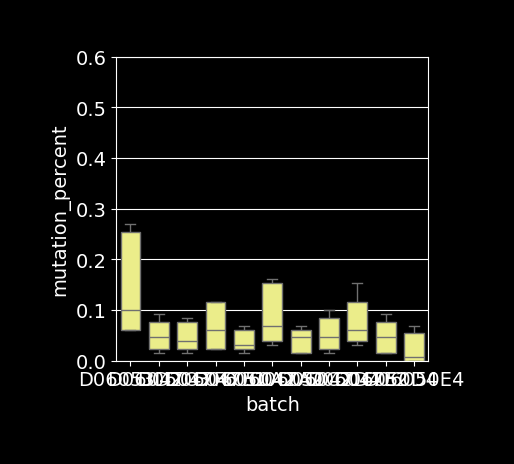

In [56]:
fig, ax = plt.subplots(figsize=(4, 4))
sns.boxplot(data=df,x='batch',y='mutation_percent',showfliers=False, whis=[20, 80],width=0.7,color = '#fbfd79',ax = ax,order =batch_order)
plt.ylim(0,0.6)   
plt.savefig('Figure2L.pdf')

# Figure2M

In [57]:
adata = sc.read_h5ad('/data1/fengyu/methods/zy/P5_D06053D2_ananlysis/Latest_analysis_6.12/readid4/Final_D06053D2_after_processed_cellbin.h5ad')

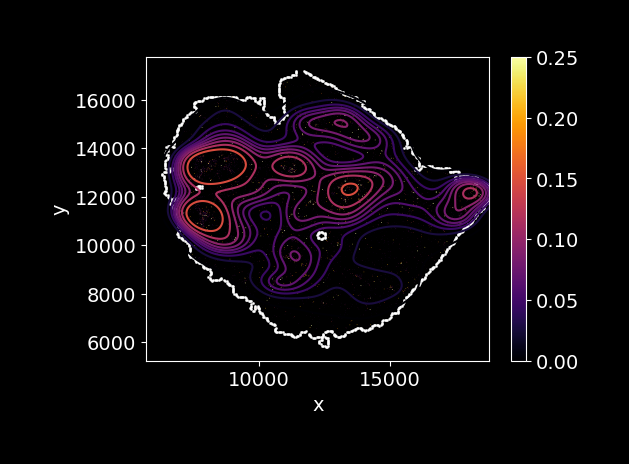

In [59]:
df=adata.obs
plt.figure(figsize=(5.5, 4))
plt.style.use('dark_background')
#sns.scatterplot(data=df,x='x',y='y', cmap='lightgrey', s=0.1,legend=None)
sns.scatterplot(data = tissue_outline ,x='x',y='y',color='white',s=3)
plt.scatter(df['x'], df['y'], s=df['mutation_percent'], c=df['mutation_percent'], cmap='inferno', vmax=0.25)
plt.colorbar()
sns.kdeplot(data=df[df['mutation_percent'].notna()], x='x', y='y', weights='mutation_percent',
            fill=False, cmap ='inferno', bw_adjust=0.9, cut=0.2)
#sns.scatterplot(data=df[df['mutation_percent'].notna()],x='x',y='y',hue='mutation_percent',palette='inferno',edgecolor='none',s=4)
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5),markerscale=4)
plt.grid(False)
plt.savefig('./fig2m.pdf',dpi=600, bbox_inches='tight')

# Figure2N

In [60]:
adata.obs['label'] = adata.obs['label'].astype(str)
scatter = adata.obs[(adata.obs['label'] == '2|A') | (adata.obs['label'] == '15|A') | (adata.obs['label'] == '21|G')]
scatter = scatter[scatter['clone_family_id'] == 375.0]

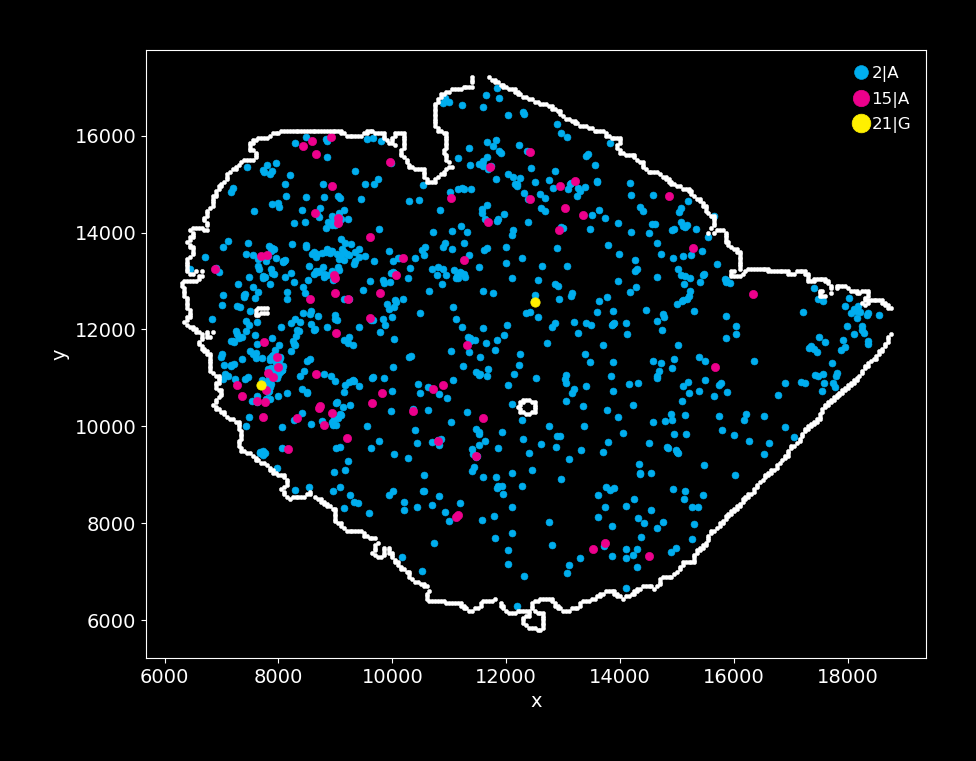

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize=(10,8))
# 设置黑色背景（全局生效）
def vector(on=False):
    if on:
        sc.set_figure_params(dpi=50, dpi_save=300, vector_friendly=False)
    else:
        sc.set_figure_params(dpi=50, dpi_save=300, vector_friendly=True)
vector(False)
plt.style.use('dark_background')
scatter1 = sns.scatterplot(data=scatter[scatter['label'] == '2|A'],x='x', y='y',color='#00aeef', s=25, marker='o', label='2|A',edgecolor = None)  
scatter2 = sns.scatterplot(data=scatter[scatter['label'] == '15|A'], x='x', y='y',color='#ed008c', s=35, marker='o',label='15|A',edgecolor = None)
scatter3 = sns.scatterplot(data=scatter[scatter['label'] == '21|G'], x='x', y='y',color='#fff000', s=45,marker='o',label='21|G',edgecolor = None)
scatter4 = sns.scatterplot(data=tissue_outline,x='x', y='y',color='white', s=10)
plt.legend(
    fontsize=12,           # 字体大小
    markerscale=2,         # 图例标记大小（相对于原图的放大倍数）
    frameon=True,          # 是否显示图例外框       # 图例标题（可选）
    title_fontsize='14',
    loc='upper right',# 图例标题字体大小
)
# ==== 坐标轴设置 ====
# 设置坐标轴颜色和标签颜色
ax.spines['bottom'].set_color('white')  # x轴颜色
ax.spines['left'].set_color('white')    # y轴颜色

ax.tick_params(axis='x', colors='white')  # x轴刻度颜色
ax.tick_params(axis='y', colors='white')  # y轴刻度颜色

ax.xaxis.label.set_color('white')  # x轴标签颜色
ax.yaxis.label.set_color('white')  
plt.gca().set_facecolor('black')  # 绘图区域背景
ax.grid(False)
# Save the figure
plt.savefig("family-375-scatter_plot.pdf", 
            format='pdf', 
            dpi=300, 
            bbox_inches='tight')

plt.show()

## 克隆扩增

In [63]:
scatter['label'] =  scatter['label'].astype(str)
clone_expansion = scatter[scatter['label'] == '2|A']
clone_expansion['cellID'] = clone_expansion['cellID'].astype(int)
df_cellborder['cellID'] = df_cellborder['cellID'].astype(int)
clone_expansion_border = df_cellborder[df_cellborder['cellID'].isin(clone_expansion['cellID'])]
clone_expansion_border_list = clone_expansion_border.groupby('cellID').apply(lambda group: [[x, y] for x, y in zip(group['x'], group['y'])]).tolist()
clone_expansion_border_list = [np.array(cell) for cell in clone_expansion_border_list]
clone_expansion_border_list[0]

/tmp/ipykernel_1652632/4028528097.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clone_expansion['cellID'] = clone_expansion['cellID'].astype(int)
/tmp/ipykernel_1652632/4028528097.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cellborder['cellID'] = df_cellborder['cellID'].astype(int)


array([[12205,  6287],
       [12197,  6279],
       [12191,  6284],
       [12180,  6284],
       [12165,  6289],
       [12159,  6302],
       [12169,  6314],
       [12173,  6314],
       [12190,  6306],
       [12205,  6305],
       [12208,  6303],
       [12208,  6293]])

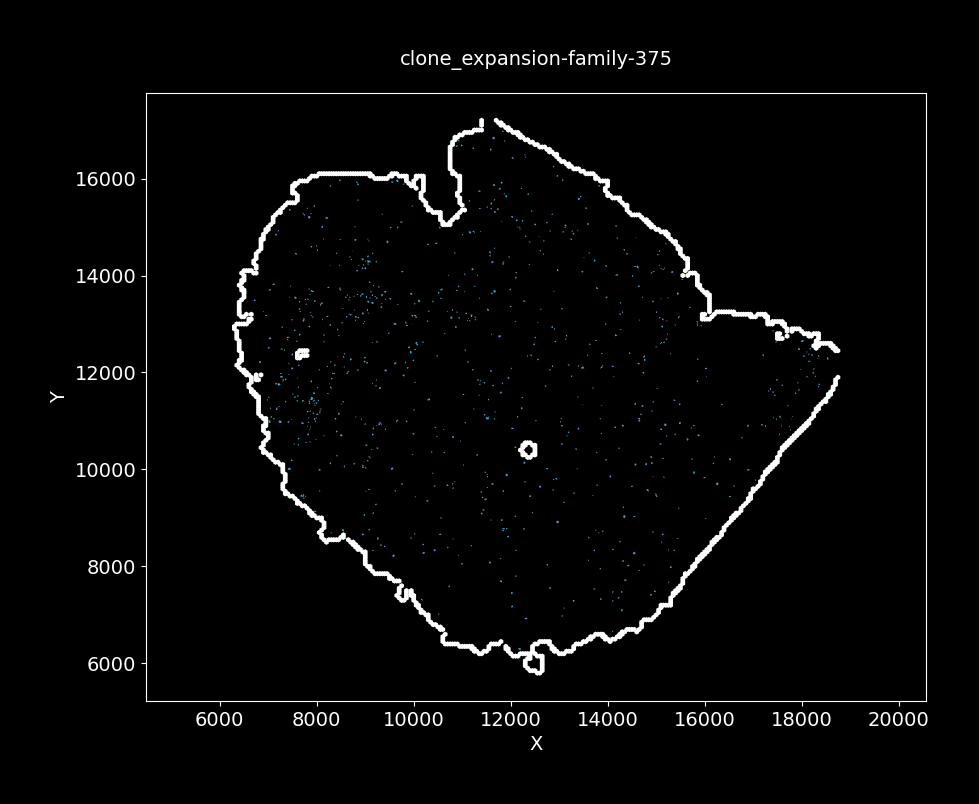

In [65]:
#就用这个代码
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import PathPatch, Polygon
from matplotlib.path import Path
from matplotlib.collections import PatchCollection
import seaborn as sns
from scipy.interpolate import splprep, splev

color = 'green'

# 设置纯黑背景
plt.style.use('dark_background')


fig, ax = plt.subplots(figsize=(10, 8))
fig.patch.set_facecolor('black')  # 确保背景纯黑

# 存储所有多边形的列表
patches = []

def smooth_boundary(boundary, smoothness=0.5):
    """使用样条插值平滑边界"""
    x = boundary[:, 0]
    y = boundary[:, 1]
    
    # 闭合曲线
    x = np.append(x, x[0])
    y = np.append(y, y[0])
    
    # 计算样条曲线
    tck, u = splprep([x, y], s=smoothness * len(x), per=True)
    u_new = np.linspace(u.min(), u.max(), 100)
    x_new, y_new = splev(u_new, tck, der=0)
    
    return np.column_stack((x_new, y_new))

# 遍历所有细胞边界
for idx, cell_boundary in enumerate(clone_expansion_border_list, start=1):
    if len(cell_boundary) < 3:
        continue  # 至少需要3个点才能形成多边形
        
    # 平滑边界
    smoothed_boundary = smooth_boundary(cell_boundary, smoothness=0.5)
    color = '#00aeef'
    
    # 创建平滑的路径
    vertices = smoothed_boundary
    codes = [Path.LINETO] * len(vertices)
    codes[0] = Path.MOVETO
    codes[-1] = Path.CLOSEPOLY
    
    path = Path(vertices, codes)
    patch = PathPatch(
        path,
        facecolor=color,
        edgecolor='white',
        lw=0.1,
        antialiased=True
    )
    patches.append(patch)

# 批量绘制多边形
ax.add_collection(PatchCollection(patches, match_original=True))

# 绘制散点图（使用白色六边形）
sns.scatterplot(
    x='x', 
    y='y', 
    data=tissue_outline,
    color='white',       # 白色散点
    marker='h',         # 六边形标记
    s=15,              # 点的大小
    edgecolor='none',   # 无边缘线
    ax=ax
)

# 固定坐标轴范围
ax.set_xlim(0, 40000)
ax.set_ylim(0, 40000)

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.grid(False)
ax.axis('equal')  # 保持比例

# 设置标题（白色文字）
ax.set_title(
    "clone_expansion-family-375",
    color='white',
    pad=20
)

# 保存为PNG（高分辨率，纯黑背景）
plt.savefig('clone_expansion-family-375.png', 
           dpi=2500,                   # 高分辨率
           bbox_inches='tight',       # 紧凑布局
           facecolor='black',         # 背景颜色
           transparent=False)         # 不透明

# 显示图形
plt.show()

## 超突变

In [67]:
shm_j = scatter[(scatter['label'] == '15|A') | (scatter['label'] == '2|A')]
df_cellborder['cellID'] = df_cellborder['cellID'].astype(int)
shm_j_cellborder = df_cellborder[df_cellborder['cellID'].isin(shm_j['cellID'])]
shm_j_cellborder['cellID'].nunique()
shm_j_cellborder_list = shm_j_cellborder.groupby('cellID').apply(lambda group: [[x, y] for x, y in zip(group['x'], group['y'])]).tolist()
shm_j_cellborder_list = [np.array(cell) for cell in shm_j_cellborder_list]
shm_j = shm_j.reset_index()
shm_j_cellborder_list[0]

/tmp/ipykernel_1652632/507892089.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cellborder['cellID'] = df_cellborder['cellID'].astype(int)


array([[12205,  6287],
       [12197,  6279],
       [12191,  6284],
       [12180,  6284],
       [12165,  6289],
       [12159,  6302],
       [12169,  6314],
       [12173,  6314],
       [12190,  6306],
       [12205,  6305],
       [12208,  6303],
       [12208,  6293]])

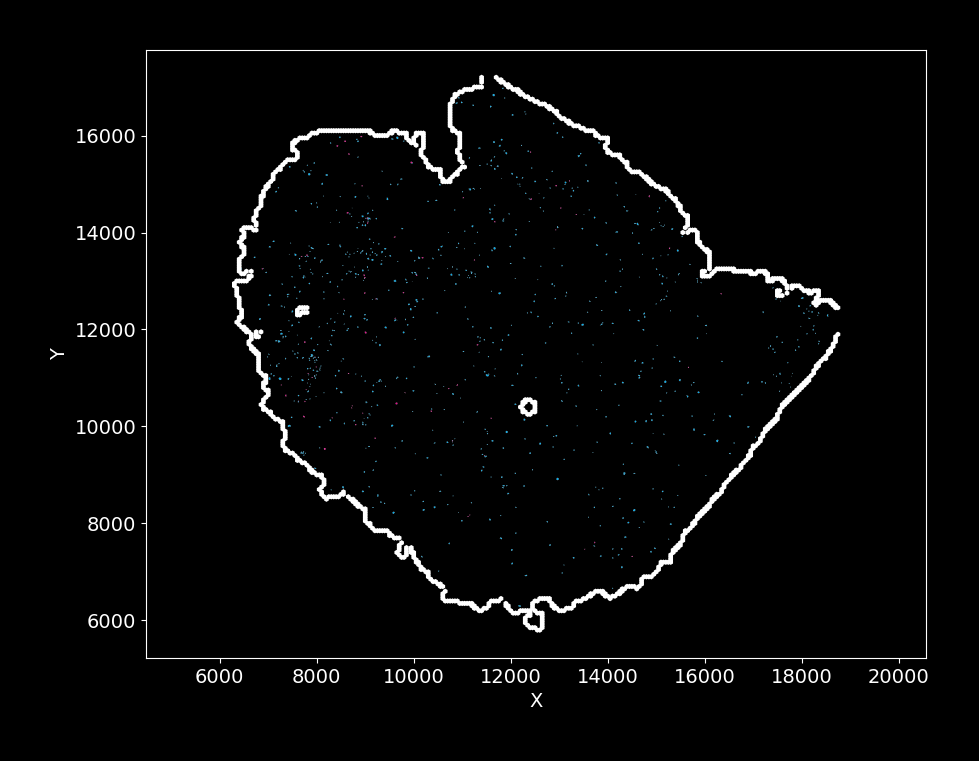

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import PathPatch
from matplotlib.path import Path
from matplotlib.collections import PatchCollection
import seaborn as sns
from scipy.interpolate import splprep, splev

# 设置纯黑背景
plt.style.use('dark_background')

# 创建图形和坐标轴
fig, ax = plt.subplots(figsize=(10, 8))
fig.patch.set_facecolor('black')  # 确保背景纯黑

# 存储所有多边形的列表
patches = []

def smooth_boundary(boundary, smoothness=0.5):
    """使用样条插值平滑边界"""
    x = boundary[:, 0]
    y = boundary[:, 1]
    
    # 闭合曲线
    x = np.append(x, x[0])
    y = np.append(y, y[0])
    
    # 计算样条曲线
    tck, u = splprep([x, y], s=smoothness * len(x), per=True)
    u_new = np.linspace(u.min(), u.max(), 100)
    x_new, y_new = splev(u_new, tck, der=0)
    
    return np.column_stack((x_new, y_new))

# 遍历所有细胞边界
for idx, cell_boundary in enumerate(shm_j_cellborder_list, start=1):
    if len(cell_boundary) < 3:
        continue  # 至少需要3个点才能形成多边形
        
    # 平滑边界
    smoothed_boundary = smooth_boundary(cell_boundary, smoothness=0.5)
    if shm_j['label'].at[idx-1] == '2|A':
        color = '#00aeef'
    elif shm_j['label'].at[idx-1] == '15|A':
        color = '#ed008c'
            
    # 创建平滑的路径
    vertices = smoothed_boundary
    codes = [Path.LINETO] * len(vertices)
    codes[0] = Path.MOVETO
    codes[-1] = Path.CLOSEPOLY
    
    path = Path(vertices, codes)
    patch = PathPatch(
        path,
        facecolor=color,
        edgecolor='white',
        lw=0.1,
        antialiased=True
    )
    patches.append(patch)

# 批量绘制多边形
ax.add_collection(PatchCollection(patches, match_original=True))

# 绘制散点图（使用白色六边形）
sns.scatterplot(
    x='x', 
    y='y', 
    data=tissue_outline,
    color='white',       # 白色散点
    marker='h',         # 六边形标记
    s=15,              # 点的大小
    edgecolor='none',   # 无边缘线
    ax=ax
)

ax.set_xlim(0, 40000)
ax.set_ylim(0, 40000)

ax.set_xlabel("X", color='white')
ax.set_ylabel("Y", color='white')
ax.grid(False)  # 确保网格线不显示
ax.axis('equal')  # 保持比例


# 保存为PNG（高分辨率，纯黑背景）
plt.savefig('shm-family-375.png', 
           dpi=2500,                   # 高分辨率
           bbox_inches='tight',       # 紧凑布局
           facecolor='black',         # 背景颜色
           transparent=False)         # 不透明

# 显示图形
plt.show()

## CSR

In [70]:
CSR_j = scatter[(scatter['label'] == '15|A') | (scatter['label'] == '21|G')]
df_cellborder['cellID'] = df_cellborder['cellID'].astype(int)
CSR_j_cellborder = df_cellborder[df_cellborder['cellID'].isin(CSR_j ['cellID'])]
CSR_j_cellborder['cellID'].nunique()
CSR_j_cellborder_list = CSR_j_cellborder.groupby('cellID').apply(lambda group: [[x, y] for x, y in zip(group['x'], group['y'])]).tolist()
CSR_j_cellborder_list = [np.array(cell) for cell in CSR_j_cellborder_list]
CSR_j = CSR_j.reset_index()
CSR_j_cellborder_list[0]

/tmp/ipykernel_1652632/4255661973.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cellborder['cellID'] = df_cellborder['cellID'].astype(int)


array([[14493,  7311],
       [14494,  7319],
       [14496,  7319],
       [14513,  7328],
       [14515,  7328],
       [14519,  7325],
       [14518,  7320],
       [14516,  7317],
       [14516,  7314],
       [14510,  7314],
       [14503,  7311]])

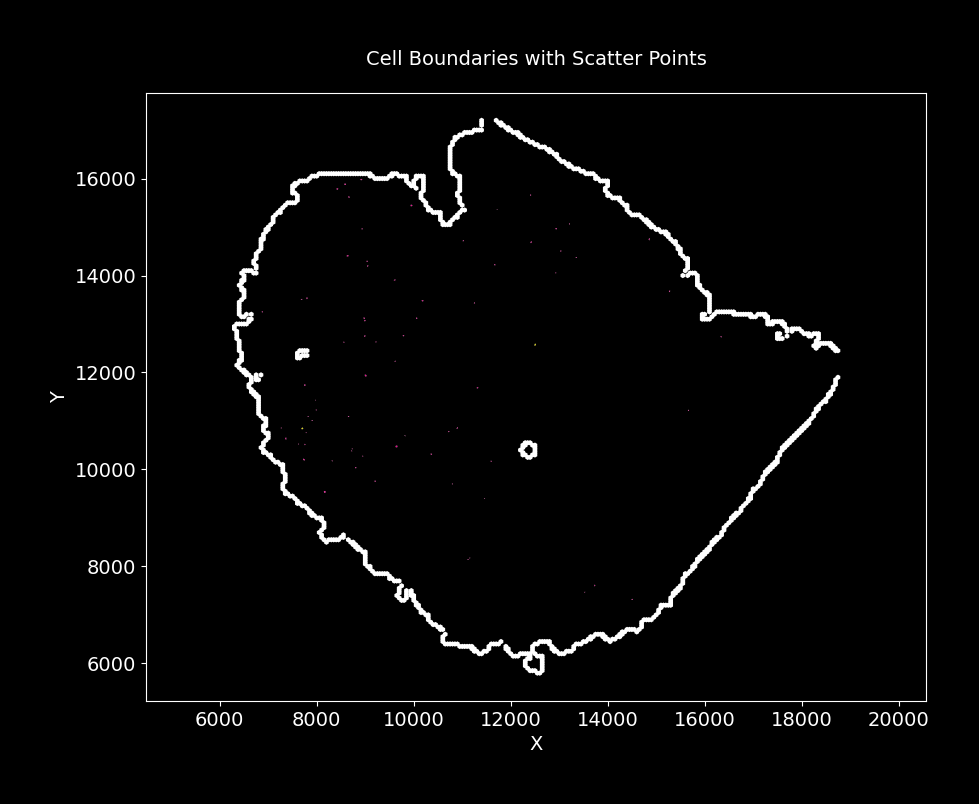

In [71]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import PathPatch
from matplotlib.path import Path
from matplotlib.collections import PatchCollection
import seaborn as sns
from scipy.interpolate import splprep, splev

# 设置纯黑背景
plt.style.use('dark_background')

# 创建图形和坐标轴
fig, ax = plt.subplots(figsize=(10, 8))
fig.patch.set_facecolor('black')  # 确保背景纯黑

# 存储所有多边形的列表
patches = []

def smooth_boundary(boundary, smoothness=0.5):
    """使用样条插值平滑边界"""
    x = boundary[:, 0]
    y = boundary[:, 1]
    
    # 闭合曲线
    x = np.append(x, x[0])
    y = np.append(y, y[0])
    
    # 计算样条曲线
    tck, u = splprep([x, y], s=smoothness * len(x), per=True)
    u_new = np.linspace(u.min(), u.max(), 100)
    x_new, y_new = splev(u_new, tck, der=0)
    
    return np.column_stack((x_new, y_new))

# 遍历所有细胞边界
for idx, cell_boundary in enumerate(CSR_j_cellborder_list, start=1):
    if len(cell_boundary) < 3:
        continue  # 至少需要3个点才能形成多边形
        
    # 平滑边界
    smoothed_boundary = smooth_boundary(cell_boundary, smoothness=0.5)
    if CSR_j['label'].at[idx-1] == '21|G':
        color = '#fff000'
    elif CSR_j['label'].at[idx-1] == '15|A':
        color = '#ed008c'
            
    # 创建平滑的路径
    vertices = smoothed_boundary
    codes = [Path.LINETO] * len(vertices)
    codes[0] = Path.MOVETO
    codes[-1] = Path.CLOSEPOLY
    
    path = Path(vertices, codes)
    patch = PathPatch(
        path,
        facecolor=color,
        edgecolor='white',
        lw=0.1,
        antialiased=True
    )
    patches.append(patch)

# 批量绘制多边形
ax.add_collection(PatchCollection(patches, match_original=True))

# 绘制散点图（使用白色六边形）
sns.scatterplot(
    x='x', 
    y='y', 
    data=tissue_outline,
    color='white',       # 白色散点
    marker='h',         # 六边形标记
    s=15,              # 点的大小
    edgecolor='none',   # 无边缘线
    ax=ax
)

ax.set_xlim(0, 40000)
ax.set_ylim(0, 40000)

ax.set_xlabel("X", color='white')
ax.set_ylabel("Y", color='white')
ax.grid(False)  # 确保网格线不显示
ax.axis('equal')  # 保持比例

# 设置标题（白色文字）
ax.set_title(
    "Cell Boundaries with Scatter Points",
    color='white',
    pad=20
)

# 保存为PNG（高分辨率，纯黑背景）
plt.savefig('Class-switch-family-375.png', 
           dpi=2500,                   # 高分辨率
           bbox_inches='tight',       # 紧凑布局
           facecolor='black',         # 背景颜色
           transparent=False)         # 不透明

# 显示图形
plt.show()